In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxs
import json


In [2]:
data = pd.read_csv("Data/datavalidation.csv")
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253006,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253007,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253008,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253009,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


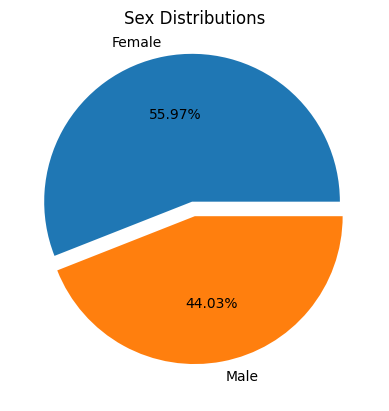

In [134]:
fig = data.groupby(["Sex"]).size().plot(kind="pie",autopct="%.2f%%",labels=["Female","Male"],explode=[0.1,0],title="Sex Distributions")
fig.get_figure().savefig("Visuals/Sex_Dist.png")

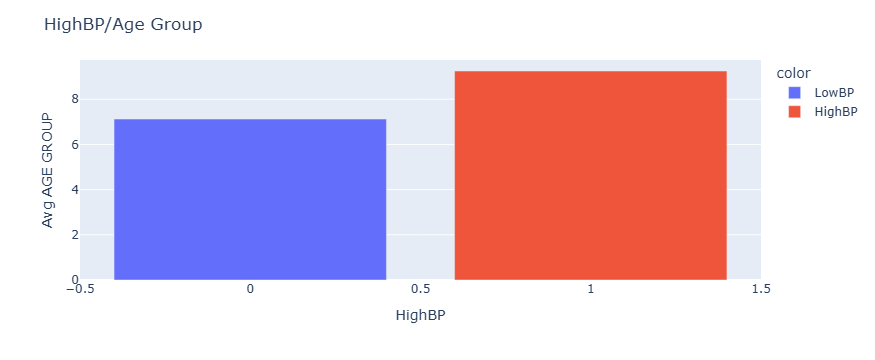

In [139]:
fig = pxs.bar(data.groupby(["HighBP"]).agg({"Age":"mean"}),color=["LowBP","HighBP"])
fig.update_layout(title="HighBP/Age Group",yaxis_title="Avg AGE GROUP")
fig.write_html("Visuals/HighBP_Age_Group.html")
fig.show()

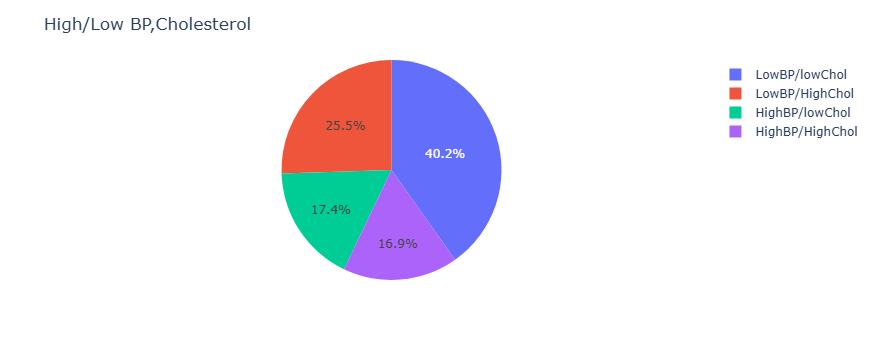

In [140]:
names = ["LowBP/lowChol","HighBP/HighChol","HighBP/lowChol","LowBP/HighChol"]
fig = pxs.pie(values=data.groupby(["HighBP","HighChol"]).size(),names=names)
fig.update_layout(title="High/Low BP,Cholesterol")
fig.write_html("High_Low_BP_Cholesterol.html")
fig.show()

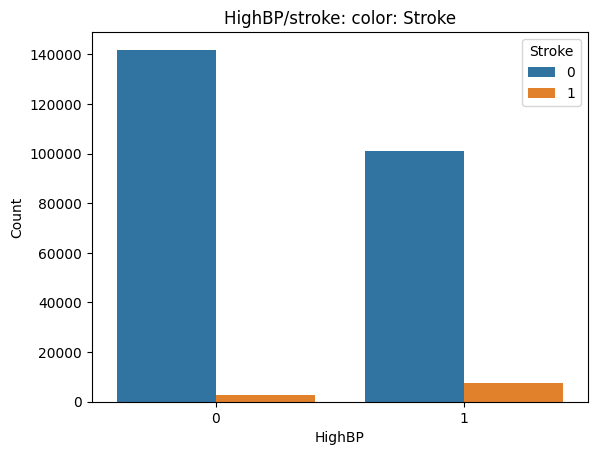

In [144]:
fig = sns.barplot(data.groupby(["HighBP","Stroke"]).size().reset_index(drop=False),x="HighBP",y=0,hue="Stroke")
plt.title("HighBP/stroke: color: Stroke")
plt.ylabel("Count")
plt.savefig("Visuals/HighBP_stroke_color_Stroke.png")
plt.show()

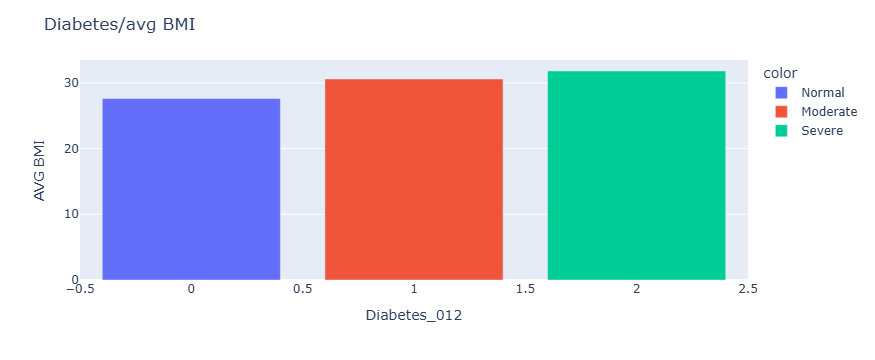

In [145]:
fig = pxs.bar(data.groupby(["Diabetes_012"]).agg({"BMI":"mean"}),color=["Normal","Moderate","Severe"])
fig.update_layout(title="Diabetes/avg BMI",yaxis_title="AVG BMI")
fig.write_html("Visuals/Diabetes_avg_BMI.html")
fig.show()

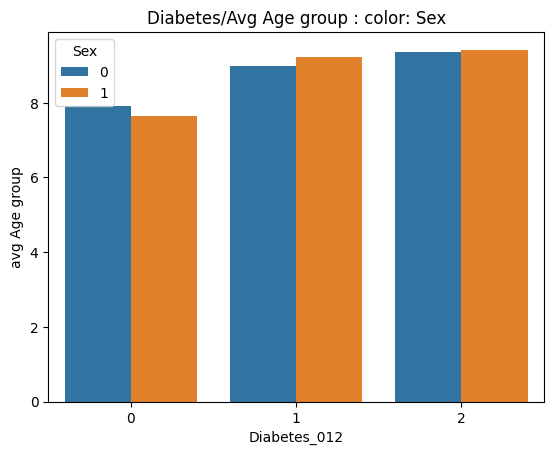

In [146]:
sns.barplot(data.groupby(["Diabetes_012","Sex"]).agg({"Age":"mean"}),x="Diabetes_012",y="Age",hue="Sex")
plt.title("Diabetes/Avg Age group : color: Sex")
plt.ylabel("avg Age group")
plt.savefig("Visuals/Diabetes_Avg_Age_group_color_Sex.png")
plt.show()